# 1. Datos: Precipitaciones, Indicadores Económicos del Banco Central

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
precipitaciones = pd.read_csv("precipitaciones.csv")
banco_central = pd.read_csv("banco_central.csv")


# 2. Análisis de Datos. Creación de variables

## 2.1 Análisis Exploratorio datos

## Precipitaciones

In [3]:
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [4]:
precipitaciones.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [5]:
precipitaciones.isna().sum()

date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

In [6]:
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


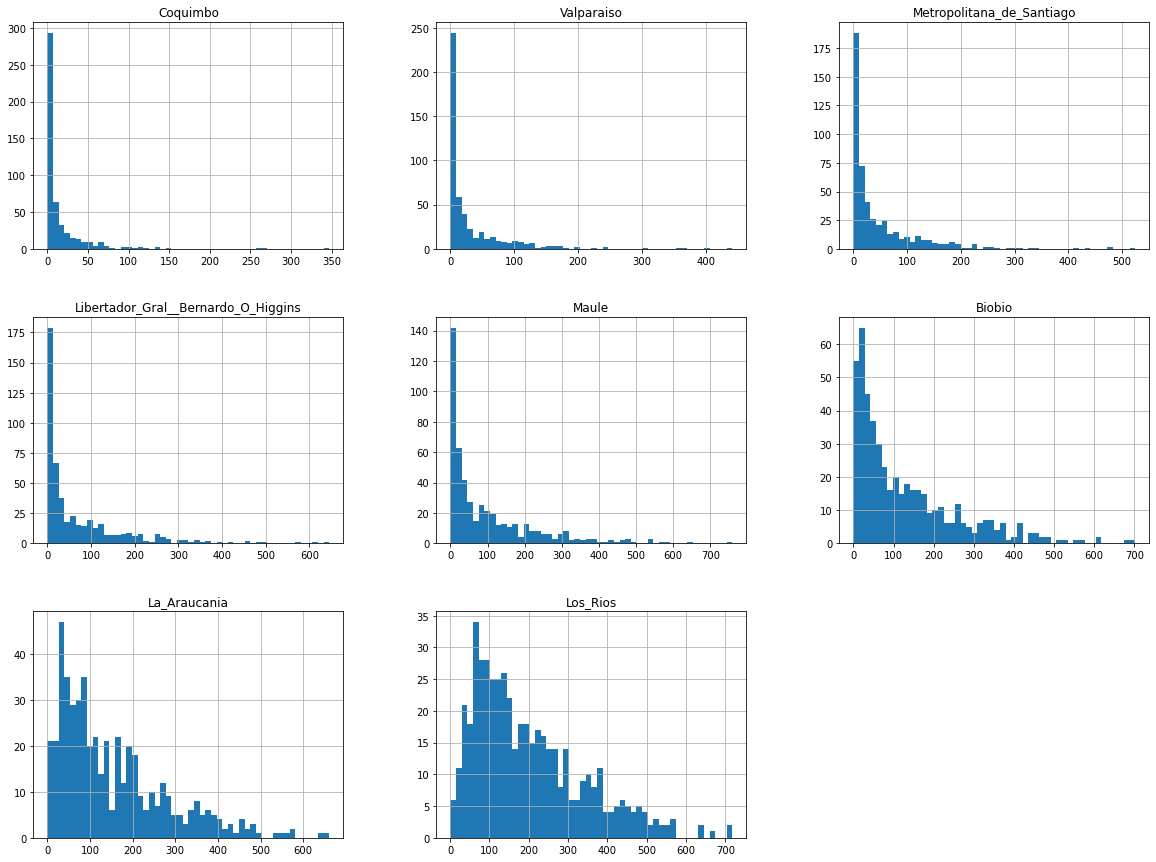

In [7]:
# histogramas

# respuesta 2.1
# las precipitaciones van aumentando en la medida que la región está mas al sur, siendo la región de los Ríos con mayor cantidad de mm por lluvia


precipitaciones.hist(bins=50, figsize=(20,15))
plt.show()


In [8]:
# correlations

corr_matrix = precipitaciones.corr()

# estudiemos, por ejemplo, la correlación de las precipitaciones con Santiago

corr_matrix['Metropolitana_de_Santiago'].sort_values(ascending=False)

Metropolitana_de_Santiago              1.000000
Libertador_Gral__Bernardo_O_Higgins    0.976389
Valparaiso                             0.967567
Maule                                  0.904947
Coquimbo                               0.813478
Biobio                                 0.804073
La_Araucania                           0.729807
Los_Rios                               0.677950
Name: Metropolitana_de_Santiago, dtype: float64

1. Es decir, las regiones mas cercanas están altamente correlacionadas con Santiago

In [9]:
precipitaciones.columns

Index(['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios'],
      dtype='object')

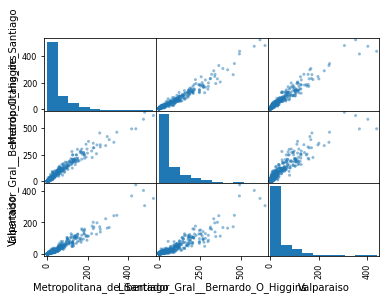

In [10]:
from pandas.plotting import scatter_matrix

zonas_centro = ["Metropolitana_de_Santiago", "Libertador_Gral__Bernardo_O_Higgins", "Valparaiso"]
scatter_matrix(precipitaciones[zonas_centro])
plt.show()

### Banco Central

In [11]:
banco_central.shape

(614, 85)

In [12]:
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [13]:
banco_central.columns

Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor

In [14]:
banco_central.dtypes

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

In [15]:
banco_central.isna().sum()

Periodo                                              0
Imacec_empalmado                                   314
Imacec_produccion_de_bienes                        314
Imacec_minero                                      314
Imacec_industria                                   313
                                                  ... 
Generacion_de_energia_electrica_CDEC_GWh           350
Indice_de_ventas_comercio_real_IVCM                530
Indice_de_ventas_comercio_real_no_durables_IVCM    530
Indice_de_ventas_comercio_real_durables_IVCM       529
Ventas_autos_nuevos                                469
Length: 85, dtype: int64

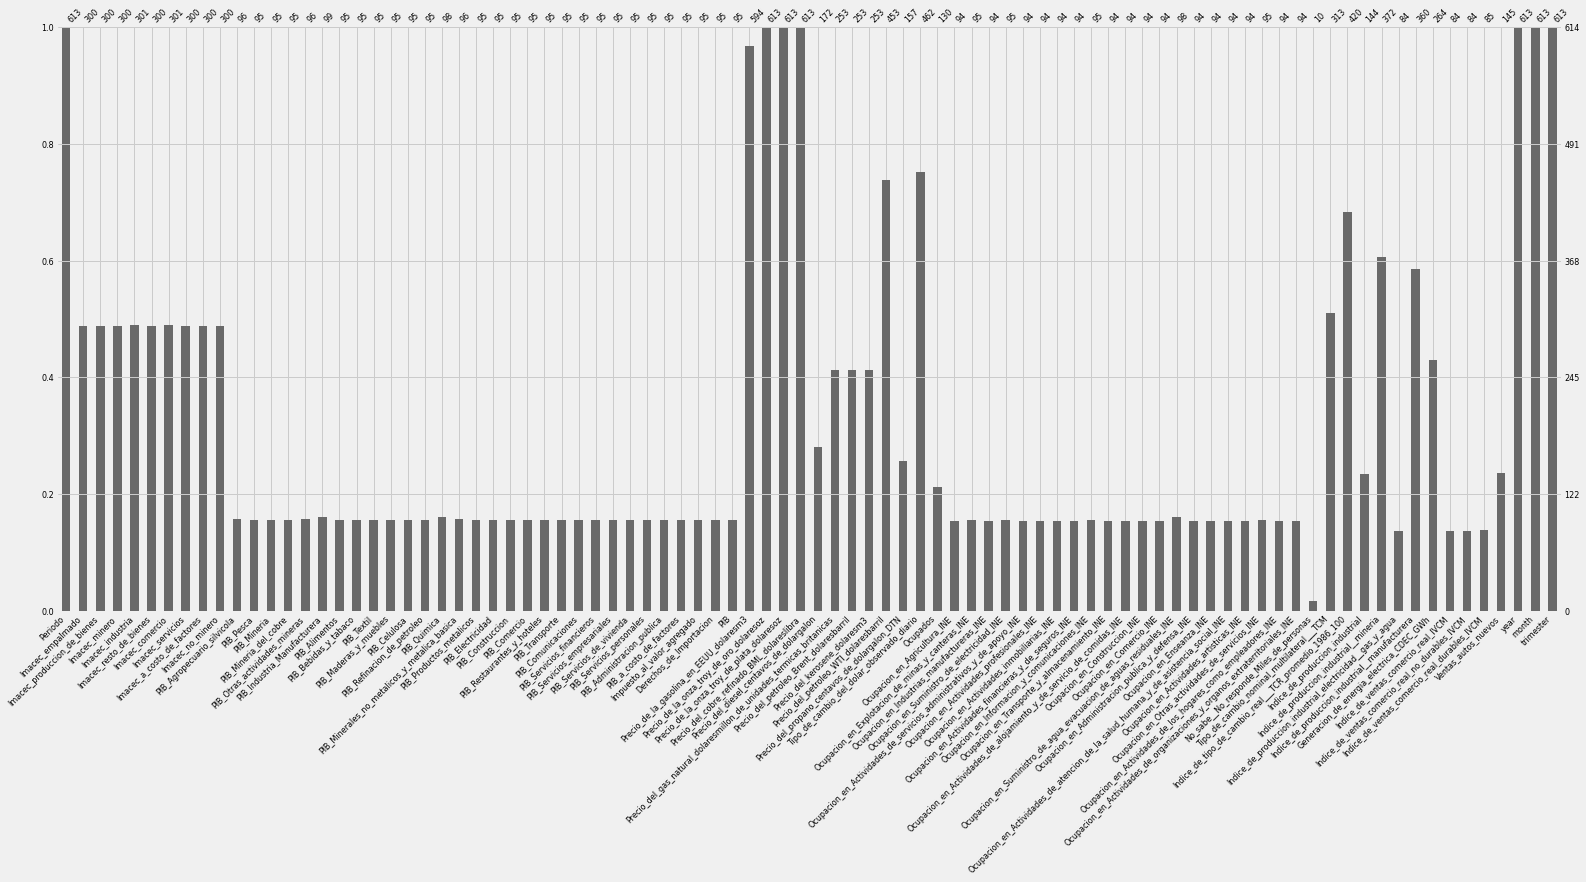

In [65]:
import missingno as msno

# 2.1: llama la atención la cantidad de datos faltantes en indicadores económicos tales como imacec, PIB, indicadores de ocupación, entre otros

msno.bar(banco_central, labels=True, fontsize=8)

## 2.2 Eliminar valores duplicados y valores incorrectos

In [27]:
# remove duplicates

def remove_duplicates(df):
    df = df.drop_duplicates(keep='last')
    return df

precipitaciones = remove_duplicates(precipitaciones)
banco_central = remove_duplicates(banco_central)

print(len(precipitaciones[precipitaciones.duplicated()]))
print(len(banco_central[banco_central.duplicated()]))

0
0


In [75]:
banco_central

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,trimester
0,2013-03-01,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0,2013.0,3.0,1.0
1,2013-04-01,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0,2013.0,4.0,2.0
2,2013-05-01,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0,2013.0,5.0,2.0
3,2013-06-01,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0,2013.0,6.0,2.0
4,2013-07-01,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0,2013.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN,2008.0,8.0,3.0
610,2008-09-01,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN,2008.0,9.0,3.0
611,2008-10-01,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN,2008.0,10.0,4.0
612,2008-11-01,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN,2008.0,11.0,4.0


In [48]:
def transform_object_columns_into_numeric(df, columns_names):
    """parses object columns into float columns"""
    df_time_series = df.copy()

    for col_name in columns_names:
        if col_name == 'Periodo': continue
        col_time_series = df_time_series[[col_name]].dropna(how='any')
        col_time_series[col_name] = col_time_series[col_name].str.replace(".", "")
        col_time_series = pd.to_numeric(col_time_series[col_name], errors="coerce").dropna(how='any').astype(float)
        
        # keep only positive index
        col_time_series = col_time_series.loc[col_time_series>0].copy()
        # replace the values of the column in the corresponding index and column
        df_time_series.loc[col_time_series.index, col_name] = col_time_series.values

        df_time_series[col_name] = pd.to_numeric(df_time_series[col_name], errors="coerce")


    return df_time_series

In [49]:
object_cols_banco_central = banco_central.select_dtypes(object)
object_columns = list(object_cols_banco_central.columns)


In [83]:
object_columns = list(object_cols_banco_central.columns)
df2 = transform_object_columns_into_numeric(banco_central, object_columns)

In [73]:
df2.isna().sum().sum()

37116

### 2.2 Remover outliers

In [87]:
from numpy import nan
from scipy import stats

def remover_outliers_zscore(df_data, name_col, tol_zscore=2.6):
    df_data["zscore_Con"] = stats.zscore(df_data[name_col])
    outlier_data = df_data.loc[np.absolute(df_data["zscore_Con"]) > tol_zscore].copy()
    df_data.loc[outlier_data.index, name_col] = nan

    del df_data['zscore_Con']

    return df_data


In [ ]:
remove_columns = ['Periodo', 'year', 'month', 'trimestre']
df2_columns = set(df2.columns)

keep_columns = list(df2_columns.difference(remove_columns))


for col_name in keep_columns:
    df2 = remover_outliers_zscore(df2, col_name)

37116

# 3. Visualización

In [89]:
def filter_df_by_dates(df, initial_date, final_date):
    """filters data in df in between the dates initial_date and final_date"""
    condition_dates = (df.index>= initial_date) & (df.index<= final_date)
    df_filtered_by_date = df.loc[condition_dates]
    assert len(df_filtered_by_date)!=0, f"no data in between {initial_date} and {final_date}"

    return df_filtered_by_date

def parse_dates(df, field_name):
    """converts date field into datetime object"""
    # parse strings and conversions to datetime type
    df[field_name] = pd.to_datetime(df[field_name], errors='coerce').astype('datetime64[ns]')

    return df

def swap_dates(initial_date, final_date):
    """swap dates if neccessary"""
    initial_date, final_date = pd.to_datetime(initial_date), pd.to_datetime(final_date)
    if initial_date> final_date:
        initial_date, final_date = final_date, initial_date  # swap dates in case of error
    return initial_date, final_date

def plot_precipitations(region_name, initial_date, final_date, df):
    """
    initial_date: str
                date with the format 'YYYY-MM-DD'
    initial_date: str
                date with the format 'YYYY-MM-DD'
    region_name: str
           name of the region
    df: pandas.DataFrame
        dataframe with 'date' among its columns
    """
    precipitaciones = df.copy()

    initial_date, final_date = swap_dates(initial_date, final_date)
    precipitaciones = parse_dates(precipitaciones, 'date')

    # sort values and set date as index
    precipitaciones.sort_values(['date'], inplace=True)
    precipitaciones = precipitaciones.set_index('date')

    # conditions to filter the data
    condition_region = (region_name in list(precipitaciones.columns))

    assert condition_region, f"region {region_name} not found. try a region in {df.drop(['date'], axis=1).columns}"

    df_filtered_by_date = filter_df_by_dates(precipitaciones, initial_date, final_date)
    
    plt.style.use('fivethirtyeight')
    ax = df_filtered_by_date[region_name].plot()
    ax.set_xlabel("Date")
    ax.set_ylabel("precipitacion level (mm)")
    ax.set_title(f"precipitations in {region_name} in between {initial_date.date()} and {final_date.date()}", fontsize=10)
    plt.show()


    # plt.scatter(x="date", y=region_name, data=df_filtered_by_date)

# 3.1

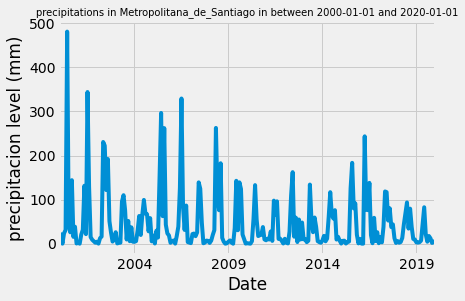

In [90]:
# Región Metropolitana entre "2000-01-01" y "2020-01-01"

initial_date = "2000-01-01"
final_date = "2020-01-01"
region_name = "Metropolitana_de_Santiago"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

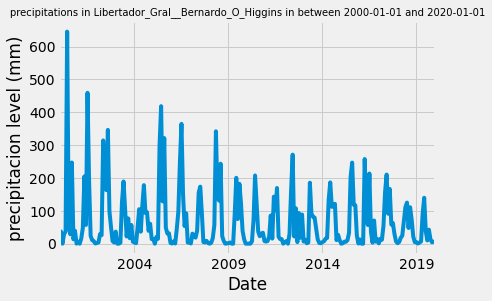

In [91]:
# L entre "2000-01-01" y "2020-01-01"

initial_date = "2000-01-01"
final_date = "2020-01-01"
region_name = "Libertador_Gral__Bernardo_O_Higgins"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

### Analysis of a year

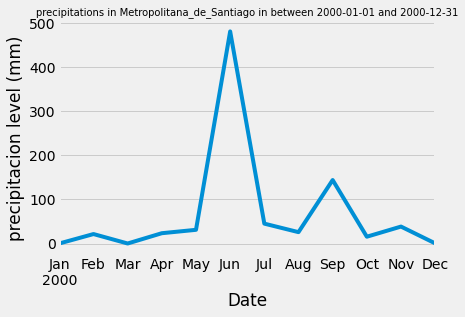

In [92]:
# 2020 in Region Metropolitana

initial_date = "2000-01-01"
final_date = "2000-12-31"
region_name = "Metropolitana_de_Santiago"

plot_precipitations(region_name, initial_date, final_date, precipitaciones)

In [93]:
# 1. se observan comportamientos parecidos en cuanto a precipitaciones, con la diferencia de que en Libertador Bernardo O'Higgins hay un mayor volumen en mm
# 2. además, se observa claramente que los mm de lluvia han ido disminuyendo año a año en una misma región. Por ejemplo, en el caso de la RM, el nivel de precipitaciones el 2019
# es cerca de un quinto se lo que fue en 2000
# 3. Analizando un año para ver las precipitaciones en las temporadas, se ve que durante el mes de Mayo a Septiembre se conservan la mayor parte de mm que caen en un año, como es de esperar.

# 3.3

In [94]:
def plot_precipitations_by_months(df, years, region_name):
    """
    plots multiple time series of precipitations by months in a collection of years
    --------------------------------------------
    df : pandas.DataFrame
        dataframe containing the field 'date'
    years: list[int]
            list of years to be plotted from df
    region_name: str
                region to be plotted.
    """
    assert len(years)!=0, "no years were given"

    precipitations = df.copy()

    # parse strings and conversions to datetime type
    precipitations = parse_dates(precipitations, 'date')

    # sort values and set date as index
    precipitations.sort_values(['date'], inplace=True)
    precipitations['year'] = precipitations['date'].dt.year
    precipitations['month'] = precipitations['date'].dt.month

    # conditions to filter the data
    condition_region = (region_name in list(precipitaciones.columns))
    assert condition_region, f"region {region_name} not found. try a region in {df.drop(['date'], axis=1).columns}"

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(16,12))
    for year in years:
        df_year = precipitations.loc[precipitations.year == year].copy()
        if len(df_year)==0:
            print(f"no data for year {year}!")
            continue
        
        df_year = df_year.set_index('month')

        ax = df_year[region_name].plot(label=year)

    ax.set_xlabel("Months")
    ax.set_ylabel("precipitacion level (mm)")
    ax.set_title(f"precipitations through years in {region_name}", fontsize=15)

    plt.legend()
    plt.show()

# 3.4

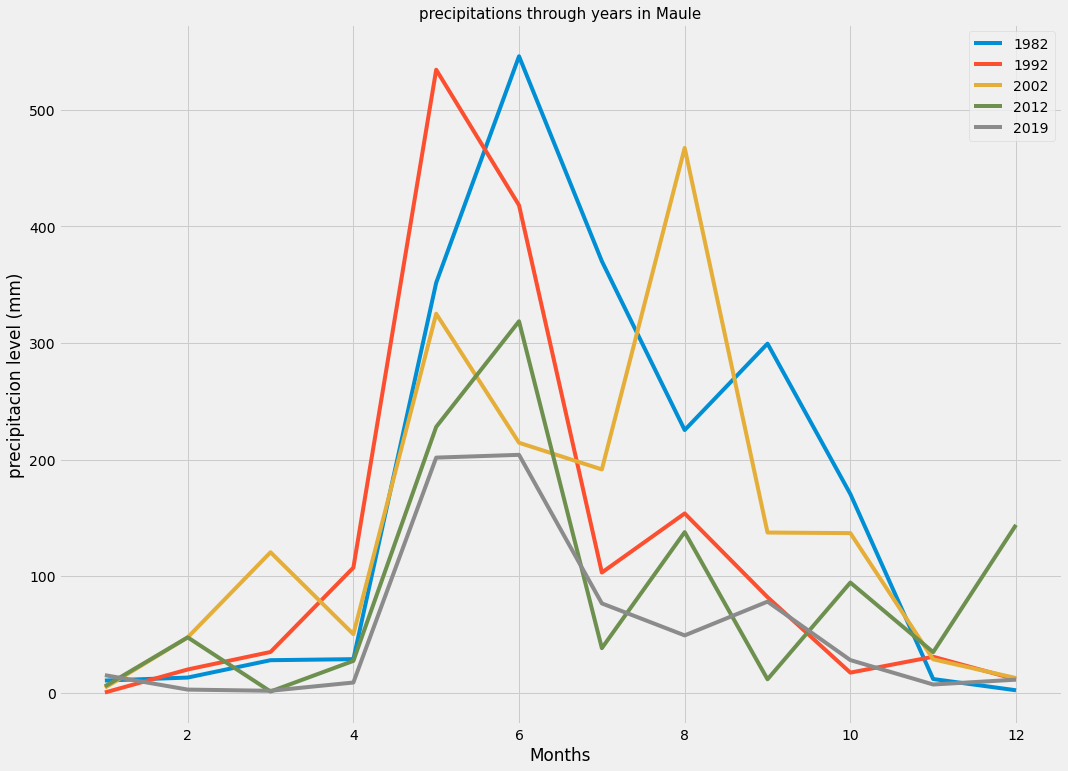

In [95]:
# Precipitations in Region del Maule in the years 1982, 1992, 2002, 2012 and 2019
region_name = "Maule"
years = [1982, 1992, 2002, 2012, 2019]

plot_precipitations_by_months(precipitaciones, years, region_name)

In [96]:
# one clear conclusion is the disminution of the precipitaton level in the years 2012 and 2019 compared to previous years

# 3.5

In [97]:
PIB_columns = [pib_word for pib_word in banco_central.columns if "PIB" in pib_word]
print(PIB_columns)

['PIB_Agropecuario_silvicola', 'PIB_Pesca', 'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras', 'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco', 'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa', 'PIB_Refinacion_de_petroleo', 'PIB_Quimica', 'PIB_Minerales_no_metalicos_y_metalica_basica', 'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion', 'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte', 'PIB_Comunicaciones', 'PIB_Servicios_financieros', 'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda', 'PIB_Servicios_personales', 'PIB_Administracion_publica', 'PIB_a_costo_de_factores', 'PIB']


In [98]:
from sklearn import preprocessing


def preprocess_pib_columns(df, pib_col_name, date_name):
    """gives a time series ready to be plotted"""
    df_time_series = df.copy()
    df_time_series = df_time_series[[pib_col_name]].dropna(how='any')
    df_time_series[pib_col_name] = df_time_series[pib_col_name].str.replace(".", "")
    df_time_series[pib_col_name] = pd.to_numeric(df_time_series[pib_col_name], errors="coerce").dropna(how='any').astype(int)
    df_time_series.dropna(how='any', inplace=True)
    # df_time_series = df_time_series.set_index(date_name)

    # # scale data
    # min_max_scaler = preprocessing.MinMaxScaler()
    # pib_scaled = min_max_scaler.fit_transform(df_time_series.values)

    # df_time_series = pd.DataFrame(pib_scaled, columns=df_time_series.columns)
    
    return df_time_series

def plot_PIB_time_series(df, time_series_name_1, time_series_name_2, initial_date, final_date):

    initial_date, final_date = swap_dates(initial_date, final_date)
    
    df_pib = df.copy()
    df_pib = parse_dates(df_pib, 'Periodo')
    df_pib.dropna(subset=["Periodo"], inplace=True)

    # sort values and set date as index
    df_pib.sort_values(['Periodo'], inplace=True)
    df_pib = df_pib.set_index('Periodo')

    df_filtered_by_date = filter_df_by_dates(df_pib, initial_date, final_date)
    
    names_time_series = [time_series_name_1, time_series_name_2]
    assert set(names_time_series).issubset(df_pib.columns)

    plt.figure(figsize=(16,16))
    for time_series in names_time_series:
        df_pib_to_plot = preprocess_pib_columns(df_filtered_by_date, time_series, "Periodo")  
        plt.style.use('fivethirtyeight')
        ax = df_pib_to_plot[time_series].plot(label = time_series)
    ax.set_xlabel("Date")
    ax.set_ylabel("PIB")
    ax.set_title(f"{names_time_series[0]} y {names_time_series[1]}")
    plt.legend()
    plt.show()


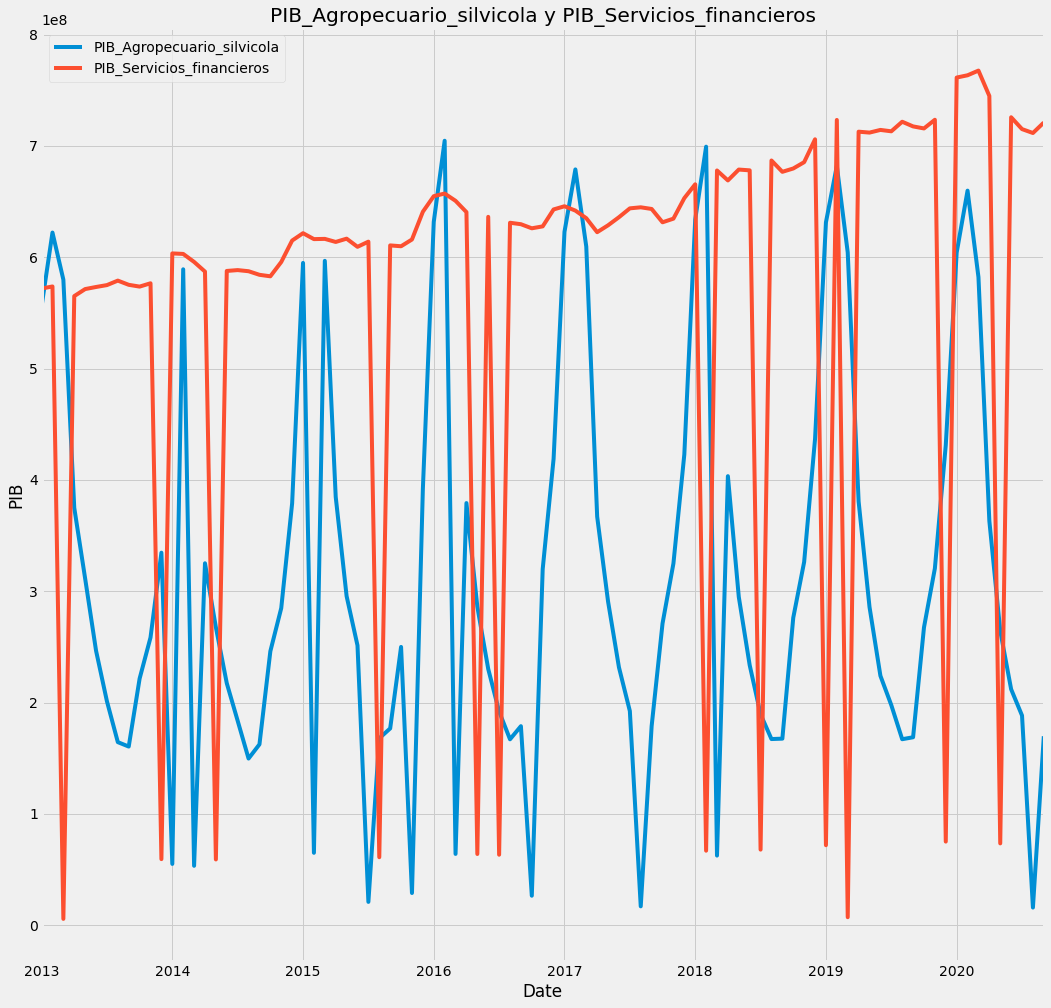

In [99]:
def get_most_recent_date(df, date_name):
    df_parsed = parse_dates(df, date_name)

    return df_parsed[date_name].max()

initial_date = pd.to_datetime("2013-01-01")
final_date = get_most_recent_date(banco_central, 'Periodo')

plot_PIB_time_series(banco_central, "PIB_Agropecuario_silvicola", "PIB_Servicios_financieros", initial_date, final_date)

# Resupuestas

1. Para el PIB_agropecuario_silvicola se puede apreciar una clara estacionalidad de la serie de tiempo, siendo los puntos mas bajos entre el segundo y cuarto trimestre cada año, y los puntos altos en el primero y el cuarto.
2. Para el PIB_servicios_financieros se asocia una clara tendencia creciente

Por otro lado, las series de tiempo parecen tener una correlación negativa, aunque esto quedaría mas claro en un scatter plot


# 4. Tratamiento y creación de variables

# 4.1 La correlación entre dos series de tiempo se puede medir efectivamente midiendo la correlación entre las variaciones porcentuales (por ejemplo, retornos, en el caso de finanzas) de las series de tiempo que se están evaluando.

In [113]:
precio_leche = pd.read_csv("precio_leche.csv")

In [101]:
precio_leche.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [102]:
print(precio_leche.Mes.unique())
print(precio_leche.Anio.unique())


['Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sep' 'Oct' 'Nov' 'Dic']
[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021]


In [114]:
# standarize months in precio_leche

def prepare_precio_leche(df):
    precio_leche = df.copy()
    months = ['Ene' ,'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    dict_months = dict(zip(months, range(1, len(months)+1)))

    precio_leche['Mes'] = precio_leche['Mes'].apply(lambda month_name: dict_months[month_name])

    return precio_leche

precio_leche = prepare_precio_leche(precio_leche)

precio_leche.head()

,Anio,Mes,Precio_leche
0,1979,1,3.85
1,1979,2,4.58
2,1979,3,5.18
3,1979,4,6.06
4,1979,5,7.25


In [115]:
# create year, month and trimester variables

def generate_time_features(df):
    banco_central = df.copy()
    banco_central = parse_dates(banco_central, 'Periodo')

    banco_central['year'] = pd.to_numeric(banco_central['Periodo'].dt.year, errors='coerce', downcast='integer')
    banco_central['month'] = pd.to_numeric(banco_central['Periodo'].dt.month, errors='coerce', downcast='integer')
    banco_central['trimester'] = banco_central['Periodo'].dt.quarter

    return banco_central

banco_central = generate_time_features(banco_central)

banco_central[['Periodo', 'year', 'month', 'trimester']].head()

,Periodo,year,month,trimester
0,2013-03-01,2013.0,3.0,1.0
1,2013-04-01,2013.0,4.0,2.0
2,2013-05-01,2013.0,5.0,2.0
3,2013-06-01,2013.0,6.0,2.0
4,2013-07-01,2013.0,7.0,3.0


In [105]:
# merge banco_central, precio_leche y precipitaciones

precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [106]:
print(precipitaciones.shape)
print(banco_central.shape)

(496, 9)
(612, 88)


In [107]:
precipitaciones =  parse_dates(precipitaciones, 'date')
banco_central = parse_dates(banco_central, 'Periodo')

In [108]:
df_model = pd.merge(precipitaciones, banco_central, left_on='date', right_on='Periodo', how='inner')

In [109]:
print(df_model.shape)
df_model.head()

(496, 97)


,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,...,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,trimester
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010,1989-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0,2.0,1.0
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041,1998-10-01,...,NaN,689.318.173,NaN,NaN,NaN,NaN,NaN,1998.0,10.0,4.0
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098,2001-02-01,...,NaN,633.960.917,307.995.553,NaN,NaN,NaN,NaN,2001.0,2.0,1.0
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488,2008-11-01,...,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN,2008.0,11.0,4.0
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235,2009-04-01,...,NaN,880.222.361,456.792.002,NaN,NaN,NaN,11991.0,2009.0,4.0,2.0


In [110]:
# merge con precios_leche

df_model = pd.merge(df_model, precio_leche, left_on=["year", "month"], right_on=["Anio", "Mes"], how="inner")

In [111]:
df_model.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,...,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,trimester,Anio,Mes,Precio_leche
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010,1989-02-01,...,NaN,NaN,NaN,NaN,1989.0,2.0,1.0,1989,2,46.38
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041,1998-10-01,...,NaN,NaN,NaN,NaN,1998.0,10.0,4.0,1998,10,91.77
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098,2001-02-01,...,NaN,NaN,NaN,NaN,2001.0,2.0,1.0,2001,2,114.30
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488,2008-11-01,...,NaN,NaN,NaN,NaN,2008.0,11.0,4.0,2008,11,187.49
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235,2009-04-01,...,NaN,NaN,NaN,11991.0,2009.0,4.0,2.0,2009,4,150.91


### 4.3 Juntar preparación df, limpieza, creación de variables y merge

In [133]:
def prepare_df(df_precipitaciones, df_banco_central, df_precio_leche):
    # drop duplicates
    df_precipitaciones = remove_duplicates(df_precipitaciones)
    df_banco_central = remove_duplicates(df_banco_central)
    # clean columns with z-score (pendiente)

    # parse dates
    df_precipitaciones = parse_dates(df_precipitaciones, 'date')
    df_banco_central = parse_dates(df_banco_central, 'Periodo')

    # prepare banco_central
    object_cols_banco_central = df_banco_central.select_dtypes(object)
    object_columns = list(object_cols_banco_central.columns)

    df_banco_central = transform_object_columns_into_numeric(df_banco_central, object_columns)

    # prepare precio_leche
    df_precio_leche = prepare_precio_leche(df_precio_leche)

    # generate time features banco_central
    df_banco_central = generate_time_features(df_banco_central)

    # generate lags y estadísticos acumulados (pendiente)


    # # merge
    df_model = pd.merge(df_precipitaciones, df_banco_central, left_on='date', right_on='Periodo', how='inner')
    df_model = pd.merge(df_model, df_precio_leche, left_on=["year", "month"], right_on=["Anio", "Mes"], how="inner")

    return df_model


In [134]:
precipitaciones = pd.read_csv("precipitaciones.csv")
banco_central = pd.read_csv("banco_central.csv")
precio_leche = pd.read_csv("precio_leche.csv")


df_model = prepare_df(precipitaciones, banco_central, precio_leche)

<ipython-input-89-b16a8a658113>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[field_name] = pd.to_datetime(df[field_name], errors='coerce').astype('datetime64[ns]')


In [135]:
df_model

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,Periodo,...,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,year,month,trimester,Anio,Mes,Precio_leche
0,1989-02-01,0.719033,0.117045,0.028272,0.000000,0.724667,9.172945,22.595834,52.268010,1989-02-01,...,NaN,NaN,NaN,NaN,1989.0,2.0,1.0,1989,2,46.38
1,1998-10-01,0.065216,0.000000,0.011493,0.000000,0.008968,2.089674,14.702087,45.142041,1998-10-01,...,NaN,NaN,NaN,NaN,1998.0,10.0,4.0,1998,10,91.77
2,2001-02-01,2.030026,0.047987,0.002634,0.000000,0.032163,10.768351,29.465057,65.571098,2001-02-01,...,NaN,NaN,NaN,NaN,2001.0,2.0,1.0,2001,2,114.30
3,2008-11-01,0.622784,0.000000,0.015872,0.000000,1.734168,25.083557,64.901645,113.093488,2008-11-01,...,NaN,NaN,NaN,NaN,2008.0,11.0,4.0,2008,11,187.49
4,2009-04-01,0.008065,0.000000,0.009396,0.000000,12.080715,56.233424,96.364235,155.622235,2009-04-01,...,NaN,NaN,NaN,11991.0,2009.0,4.0,2.0,2009,4,150.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,1988-10-01,0.000000,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767,1988-10-01,...,NaN,NaN,NaN,NaN,1988.0,10.0,4.0,1988,10,39.20
492,2019-08-01,0.000000,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020,2019-08-01,...,116203109.0,107385297.0,15342321.0,33059.0,2019.0,8.0,3.0,2019,8,266.37
493,2015-06-01,0.000000,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253,2015-06-01,...,980344897.0,983889422.0,965383414.0,22632.0,2015.0,6.0,2.0,2015,6,226.02
494,2016-09-01,0.000000,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419,2016-09-01,...,102585502.0,100746059.0,110349817.0,32377.0,2016.0,9.0,3.0,2016,9,202.48


In [131]:
df_model

,Anio,Mes,Precio_leche
0,1979,1,3.85
1,1979,2,4.58
2,1979,3,5.18
3,1979,4,6.06
4,1979,5,7.25
...,...,...,...
501,2020,10,274.32
502,2020,11,288.09
503,2020,12,287.29
504,2021,1,287.60
